## Q2: LSE Department of Statistics (40 marks)


For this question, we want to find out the distribution of different types of staff, gender balance, etc.

`lse_statistics_staff.pickle` under the `data` folder stores a dictionary for which it contains information on staff from the Department of Statistics. The data was collected by scrapping the content from https://www.lse.ac.uk/Statistics/People, and it only contains information on staff from the following tabs:
* "Academic faculty"
* "Academic associates - Emeritus Professors, Guest Lecturers and Visiting Staff"

Do the following:

1. Use `pickle` module to load in the data, and convert the dictionary to a `pd.DataFrame`. For each staff, the given data should have the following information:
    * Name (key of each pair, e.g. James Abdey)
        * Job title (e.g. Associate Professorial Lecturer)
    * Position (first value of each pair)
    * _Deduced_ gender (second value of each pair)
    
    Gender in the dataset is deduced based on counting pronouns like "he", "she", "his", "her" in the `About me` session of each staff's personal page. For example, this is James's page, and the "About me" session is at the bottom:
    <img src="figs/james.png" width="400"/>

    One can see the use of "his" and "he" in the paragraphs.
    
    Hint: you may find `pd.DataFrame.from_dict()` useful

---

In [ ]:

from google.colab import files

uploaded = files.upload()

# Assuming you uploaded 'lse_statistics_staff.pickle', the file is now in the current working directory.
file_path = '/Users/parthiv/Downloads/lse_statistics_staff.pickle'  # The file is in the current directory




Saving lse_statistics_staff.pickle to lse_statistics_staff.pickle


In [2]:
# Question 1
import pandas as pd
import pickle

# Adjust this file_path variable to point to the actual location of your pickle file
file_path = 'lse_statistics_staff.pickle'  # Example path, adjust as needed

# Load the pickle file
with open(file_path, 'rb') as file:
    lse_staff_data = pickle.load(file)

# Convert the dictionary to a pandas DataFrame
df_lse_staff = pd.DataFrame.from_dict(lse_staff_data, orient='index', columns=['Position', 'Deduced Gender'])

df_lse_staff.reset_index(inplace=True)
df_lse_staff.rename(columns={'index': 'Name'}, inplace=True)

df_lse_staff_indexed = df_lse_staff.set_index("Name")

df_lse_staff_indexed

,Position,Deduced Gender
Name,,
Dr James Abdey,Associate Professor (Education),m
Dr Mona Azadkia,Assistant Professor,f
Dr Marcos Barreto,Assistant Professor (Education),m
Professor Pauline Barrieu,"Professor, Head of Department and Vice-Chair o...",f
Dr Erik Baurdoux,Associate Professor,m
Professor Wicher Bergsma,Professor and Deputy Head of Department (Teach...,m
Professor Umut Cetin,Professor,m
Dr Yining Chen,Associate Professor,m
Dr Yunxiao Chen,Associate Professor,m


2. As emeritus or visiting staff are less involved and/or only join for a short period, we are going to exclude them for the rest of the analysis. Please only keep staff that are professors (including assistant and associate professors, with or without "education"), guest teachers or guest lecturers, LSE fellows and course tutors.

    Do you get the right set of data after the filtering? Do further sensible adjustment if needed.

    Hint: You may find [`.str.contains()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html), [`.str.split()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html), and/or [some other string functions](https://pandas.pydata.org/docs/user_guide/text.html) from pandas useful

In [3]:
criteria = "Professor|Guest Teacher|Guest Lecturer|LSE Fellow|Course Tutor"
filtered_staff_df = df_lse_staff_indexed[df_lse_staff_indexed['Position'].str.contains(criteria)]

# Exclude Emeritus or Visiting Staff
excluded_criteria = "Emeritus|Visiting"
filtered_staff_df = filtered_staff_df[~filtered_staff_df['Position'].str.contains(excluded_criteria, case=False)]

filtered_staff_df

,Position,Deduced Gender
Name,,
Dr James Abdey,Associate Professor (Education),m
Dr Mona Azadkia,Assistant Professor,f
Dr Marcos Barreto,Assistant Professor (Education),m
Professor Pauline Barrieu,"Professor, Head of Department and Vice-Chair o...",f
Dr Erik Baurdoux,Associate Professor,m
Professor Wicher Bergsma,Professor and Deputy Head of Department (Teach...,m
Professor Umut Cetin,Professor,m
Dr Yining Chen,Associate Professor,m
Dr Yunxiao Chen,Associate Professor,m


3. [Data exploration] Calculate the descriptive statistics on title and gender. Based on the descriptive statistics _only_, answer the following:
    * Are there any issues with the data collected? If yes, what are they?
    * Is the gender ratio of academic staff close to 50:50 within the department?



Issues: 1) Missing data: There are N/A in the deduced gender column due to the inability to figure out genders from about me. This can be seen by the difference in count between position and deduced gender.

2) High Variablity in Position: 15 unique positions suggests a lot of variability. Thus, making it harder to rank positions if needed

Gender Ratio: It is not 50:50, out of the data availble on gender the ratio between male and female is 25:12 respectively

In [ ]:


position_stats = filtered_staff_df['Position'].describe(include = 'all')
gender_stats = filtered_staff_df['Deduced Gender'].describe(include = 'all')

position_stats, gender_stats



(count            42
 unique           16
 top       Professor
 freq              9
 Name: Position, dtype: object,
 count     37
 unique     2
 top        m
 freq      25
 Name: Deduced Gender, dtype: object)

4. [Data wrangling] Cleaning and organise the data:

    * (a) Handle any issues of the data based on what you have discovered in part (3). If there is any missing data, handle them _appropriately_ and explain your rationale
    * (b) Extract the "role" and the "rank" of each staff from the `pd.DataFrame` in (3a):
        * "Role" of the staff (based on https://info.lse.ac.uk/staff/divisions/Human-Resources/The-recruitment-toolkit/Role-profiles):
            * "teaching" (the job title should have the words like "Lecturer", "Teacher", "Course Tutor", "Education" or "LSE Fellow"), e.g. Associate Professorial Lecturer
            * "faculty" (the job title should have the _word_ "Professor"), e.g. Assistant Professor
        * "Rank" of the staff:
            * "assistant" (entry-level tenure-track, should contain the word "Assistant"), e.g. Assistant Professor
            * "associate" (mid-level tenure-track, should contain the word "Associate"), e.g. Associate Professorial (Education)
            * "full" (senior-level tenure-track, does not have any of the keywords above), e.g. Professor
            * "non-tenure" (non tenure-track, should contain the words like "Guest" or "Fellow"), e.g. Guest Teacher, LSE fellow. Please treat "Course Tutor" as non-tenure as well
            
    and put the information about the role and rank as two additional columns to the data frame in (3a)
    

In [ ]:
filtered_staff_df.fillna("Unknown")


In [ ]:
def determine_role(title):
    teaching_keywords = ['Lecturer', 'Teacher', 'Course Tutor', 'Education', 'Fellow']
    if any(keyword in title for keyword in teaching_keywords):
        return 'teaching'
    elif 'Professor' in title:
        return 'faculty'
    else:
        return 'unknown'

def determine_rank(title):
    if 'Assistant' in title:
        return 'assistant'
    elif 'Associate' in title:
        return 'associate'
    elif 'Professor' in title and not any(keyword in title for keyword in ['Assistant', 'Associate']):
        return 'full'
    elif any(keyword in title for keyword in ['Guest', 'Fellow', 'Course Tutor']):
        return 'non-tenure'
    else:
        return 'unknown'

# Apply functions to the DataFrame
adjusted_filtered_df['Role'] = adjusted_filtered_df['Position'].apply(determine_role)
adjusted_filtered_df['Rank'] = adjusted_filtered_df['Position'].apply(determine_rank)

# Display the first few rows to confirm the new columns
adjusted_filtered_df

<ipython-input-96-6a1af251beba>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adjusted_filtered_df['Role'] = adjusted_filtered_df['Position'].apply(determine_role)
<ipython-input-96-6a1af251beba>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adjusted_filtered_df['Rank'] = adjusted_filtered_df['Position'].apply(determine_rank)


,Name,Position,Deduced Gender,Role,Rank
0,Dr James Abdey,Associate Professor (Education),m,teaching,associate
1,Dr Mona Azadkia,Assistant Professor,f,faculty,assistant
2,Dr Marcos Barreto,Assistant Professor (Education),m,teaching,assistant
3,Professor Pauline Barrieu,"Professor, Head of Department and Vice-Chair o...",f,faculty,full
4,Dr Erik Baurdoux,Associate Professor,m,faculty,associate
5,Professor Wicher Bergsma,Professor and Deputy Head of Department (Teach...,m,faculty,full
6,Professor Umut Cetin,Professor,m,faculty,full
7,Dr Yining Chen,Associate Professor,m,faculty,associate
8,Dr Yunxiao Chen,Associate Professor,m,faculty,associate
9,Professor Angelos Dassios,Professor,m,faculty,full


The best way to handle missing data is to substitute the missing deduced gender values with unknown. This would ensure that a decent percentage of valuable data is not being dropped due to missing values in deduced gender column. Moreover, it seems like gender is not so important for subsequent analysis, so having a few unknown values should'nt drastically impact our subsequent analysis

5. [Simple analysis] Use the `pd.DataFrame` from part (4b), to find out if the gender ratio depends on the roles and/or the rank
    * Based on your results in this part, do you think the Department of Statistics has a good gender balance among its staff?
    
    Please state the assumptions and limitations of your answers.
   
6. Communicate your results in (5) through visualisation


The gender ratio in teaching roles seems to have a better balance than in faculty roles, and it seems like the higher you go in ranking, the more male dominant it becomes.

However, it is hard to conclude there is poor gender balance based on the above data as there contains missing data and it is assumed the missing data does not change the ratios. and the sample data seems to small to make a meaningful interepretion.

Furthermore, it is assumed that the gender information from pronouns in accurate and relaible which might not be the case as they may not accurately represent the gender identity of individuals, especially for those who do not use traditional gender pronouns or whose pronouns are not mentioned.

The analysis does not account for factors such as part-time status, tenure status, or other demographic characteristics that may influence gender representation.

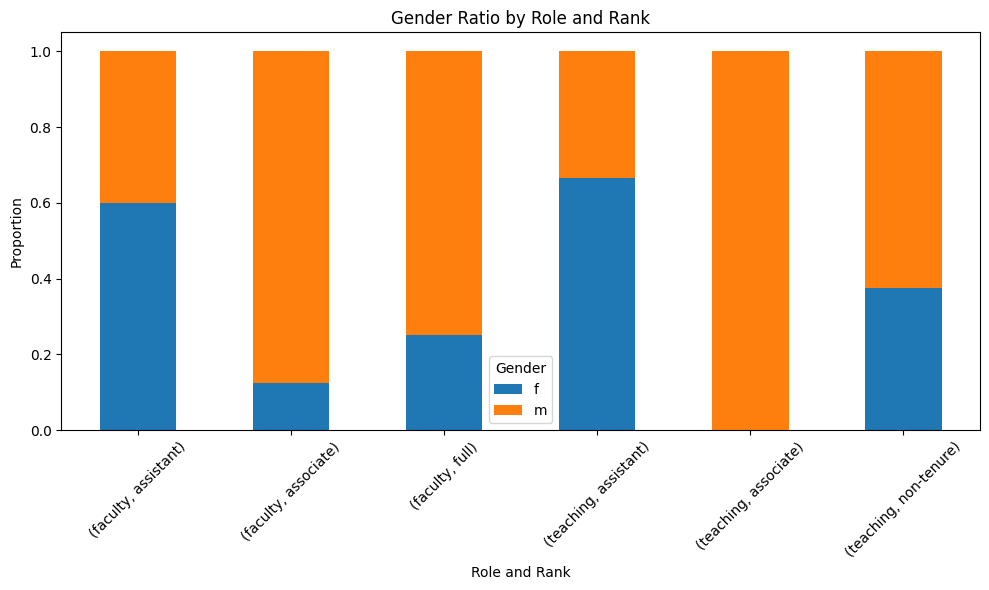

In [ ]:
#Question 6
# Calculate gender ratio for each combination of role and rank
gender_ratio = adjusted_filtered_df.groupby(['Role', 'Rank'])['Deduced Gender'].value_counts()

gender_ratio


import matplotlib.pyplot as plt

# Calculate gender ratio for each combination of role and rank
gender_ratio = adjusted_filtered_df.groupby(['Role', 'Rank'])['Deduced Gender'].value_counts(normalize=True).unstack()

# Plotting the gender ratio as a stacked bar plot
gender_ratio.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender Ratio by Role and Rank')
plt.xlabel('Role and Rank')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()





---
## Note

* Please add the code cells and markdown cells for your answers
* Please ensure you:
    * Use the right type of cells (code cells for code and markdown cells for text)
    * State clearly which answer is for which part
    * Show *all* the output of the code cells